# Coursera ML - Week 5

https://www.coursera.org/learn/machine-learning/home/week/5

## Neural Networks for Classification
### Binary classification
$y=0, 1$
### Multi-call classification (K classes)
$y \in \mathbb{R}^K$

E.g. $[1,0,0,0]^T$, $[0,1,0,0]^T$, ... for "pedestrian", "car", ...


## Cost function
### Logistic regression - recap
$$J(\theta) = -\frac{1}{m} \left[ 
\sum_{i=1}^m y^{(i)} \ln h_\theta(x^{(i)}) + (1-y^{(i)})\ln(1-h_\theta(x^{(i)}))
\right] + \frac{\lambda}{2 m} \sum_{j=1}^n\theta_j^2$$

### Neural network
$h_\theta(x) \in \mathbb{R}^K$
 
$$J(\Theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K \left[y^{(i)}_k \log ((h_\Theta (x^{(i)}))_k) + (1 - y^{(i)}_k)\log (1 - (h_\Theta(x^{(i)}))_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_{l+1}} ( \Theta_{j,i}^{(l)})^2$$

- cost function additionally summed over $k = 1..K$
- rugalarization terms summed over all elements in all layers
- bias weights $\Theta_{i0}^{(l)}$ excluded


### Gradient computation

To compute $\min_\Theta J(\Theta)$, need:

- $J(\Theta)$
- $\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta)$

#### One training example (x, y)
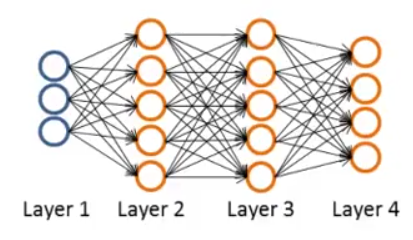

$a^{(1)} = x$

$a^{(2)} = g(z^{(2)}) = g(\Theta^{(1)} a^{(1)})$

$...$

$a^{(4)} = g(z^{(4)}) = g(\Theta^{(3)} a^{(3)}) = h_\Theta(x)$

##### Gradient computation: Backpropagation alogrithm

###### Intuition:
$\delta_j^{(l)}$ = *error* of node $j$ in layer $l$

###### Output layer:
$\delta_j^{(4)} = a_j^{(4)} - y_j = \left(h_\Theta(x)-y\right)_j$

###### Earlier layers:
$\delta^{(3)} = \left(\Theta^{(3)}\right)^T \delta^{(4)}\cdot g'\left( z^{(3)} \right)$, where gradient $g'\left( z^{(3)} \right) = a^{(3)}\cdot(1-a^{(3)})$

$\delta^{(2)} = \left(\Theta^{(2)}\right)^T \delta^{(3)}\cdot g'\left( z^{(2)} \right)$

No $\delta^{(1)}$ term

##### Derivatives
derivatives of the cost function (*ignoring regularization term*, i.e. $\lambda=0$):
$$\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = a_j^{(l)} \delta_i^{(l+1)}$$

#### Training set $\{(x^{(i)}, y^{(i)}), \dots\}$
##### Backpropagation algorithm

- set $\Delta_{ij}^{(l)} = 0$
- for $i=1..m$:
    - set $a^{(1)} = x^{(i)}$
    - Forward Propagation (FP) to compute $a^{(l)}$ for $l=2..L$
    - Backward Propagation (BP) to compute $\delta^{(l)}$ for $l=2..L$
    - set $\Delta_{ij}^{(l)} = \Delta_{ij}^{(l)} + a_j^{(l)} \delta_i^{(l+1)} $
- set $D_{ij}^{(l)} = \frac{1}{m} \Delta_{ij}^{(l)} + \lambda \Theta_{ij}^{(l)}$ for $j\neq0$
- set $D_{ij}^{(l)} = \frac{1}{m} \Delta_{ij}^{(l)}$ for $j=0$

this gives us the gradient:
$$\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)}$$